<a href="https://colab.research.google.com/github/abhijith789/Face-Image-Enhance-Upscale-with-GFPGAN/blob/main/Face_Image_Enhance_%26_Upscale_with_GFPGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

# **1.1  Installing Dependencies**

In [1]:
!pip install transformers accelerate safetensors diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [1]:
!pip install gfpgan realesrgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.

In [3]:
import os
import requests
import base64
import cv2
import torch
from torchvision import models, transforms
from PIL import Image
from gfpgan.utils import GFPGANer
from realesrgan.utils import RealESRGANer
from basicsr.archs.srvgg_arch import SRVGGNetCompact
from IPython.display import display
import os
import requests
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
from torchvision.transforms import ToTensor, Normalize, ConvertImageDtype

# - 'cv2' (OpenCV) for image processing.
# - 'torch' and 'torchvision' for deep learning models and image transformations.
# - 'PIL' (Python Imaging Library) for image file operations.
# - 'gfpgan', and 'realesrgan' for specific functions and classes related to super-resolution and face restoration.
# - 'IPython.display' for displaying images within the notebook.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# **1.2 Load Model Weights**

In [17]:
# URLs for the different model weights
model_urls = {
    # This dictionary contains URLs from which the model weights can be downloaded.
    # Each key is a model file name and the corresponding value is the download URL.
    'realesr-general-x4v3.pth': "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5.0/realesr-general-x4v3.pth",
    'GFPGANv1.4.pth': "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.4.pth",
    #'RestoreFormer.pth': "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/RestoreFormer.pth",
    #'CodeFormer.pth': "https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/CodeFormer.pth",
}

# Create a directory for the weights if it doesn't exist
os.makedirs('weights', exist_ok=True)

# This function downloads a file from a given URL and saves it with the specified filename.
# It streams the content, writing it in chunks to handle large files without consuming too much memory.
# It also prints out the status of the download.
def download_file(url, filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

# This loop goes through the dictionary of model URLs, checks if the file already exists locally,
# and if not, it uses the 'download_file' function to download and save the weights.
for filename, url in model_urls.items():
    file_path = os.path.join('weights', filename)
    if not os.path.exists(file_path):
        print(f"Downloading {filename}...")
        download_file(url, file_path)
    else:
        print(f"{filename} already exists. Skipping download.")

realesr-general-x4v3.pth already exists. Skipping download.
GFPGANv1.4.pth already exists. Skipping download.


In [5]:
# This line of code prints the list of files in the 'weights' directory.
# It's used to verify that the required model weights have been downloaded successfully.
print(os.listdir('weights'))

['realesr-general-x4v3.pth', 'GFPGANv1.4.pth']


# **2 Defining Models**

**2.1 RealESRGAN**

In [6]:
# Load RealESRGAN model
realesrgan_model_path = 'weights/realesr-general-x4v3.pth'

# Initialize RealESRGAN
sr_model = SRVGGNetCompact(num_in_ch=3, num_out_ch=3, num_feat=64, num_conv=32, upscale=4, act_type='prelu')
half = True if torch.cuda.is_available() else False
realesrganer = RealESRGANer(scale=4, model_path=realesrgan_model_path, model=sr_model, tile=0, tile_pad=10, pre_pad=0, half=half)

# Function to upscale image with RealESRGAN
def upscale_image(image_path, output_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    # Upscale the image with RealESRGAN
    output, _ = realesrganer.enhance(img, outscale=4)
    cv2.imwrite(output_path, output)
    return output

/usr/local/lib/python3.11/dist-packages/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadnet = torch.load(model_path, map_location=torch.device('cpu

**2.2 GFPGAN**

In [7]:
# Load GFPGAN model
gfpgan_model_path = 'weights/GFPGANv1.4.pth'

# Initialize GFPGAN
face_enhancer = GFPGANer(model_path=gfpgan_model_path, upscale=10, arch='clean', channel_multiplier=2, bg_upsampler=realesrganer)

# Function to enhance image with GFPGAN
def enhance_faces(image_path, output_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    # Enhance faces with GFPGAN
    _, _, img_enhanced = face_enhancer.enhance(img, has_aligned=False, only_center_face=False, paste_back=True)
    cv2.imwrite(output_path, img_enhanced)
    return img_enhanced

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/gfpgan/weights/detection_Resnet50_Final.pth



100%|██████████| 104M/104M [00:00<00:00, 344MB/s]
/usr/local/lib/python3.11/dist-packages/facexlib/detection/__init__.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lo

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /content/gfpgan/weights/parsing_parsenet.pth



100%|██████████| 81.4M/81.4M [00:00<00:00, 325MB/s]
/usr/local/lib/python3.11/dist-packages/facexlib/parsing/__init__.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lo

# **3 Enhance the Image**

**3.1 Initial Image**


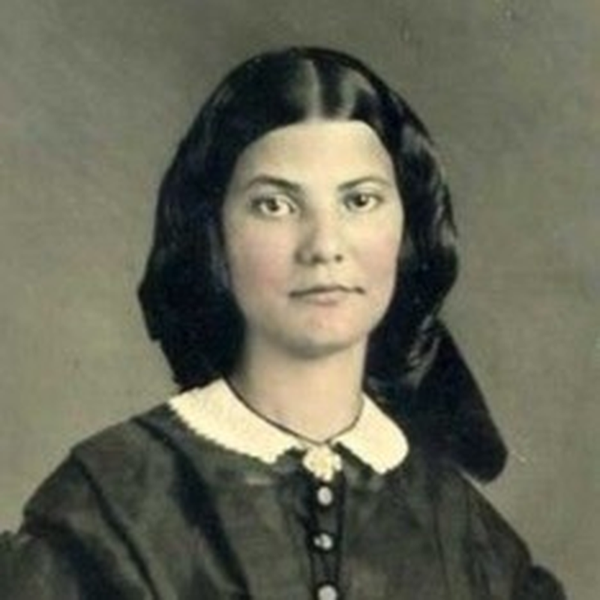

In [8]:
initial_image_path = '/content/imgae_enhance_input1.png'
# Load the image with PIL
photo = Image.open(initial_image_path)
# Display the image with a specific max width and height
display(photo.resize((600, 600), Image.LANCZOS))

**3.2 Enhance and upscale**

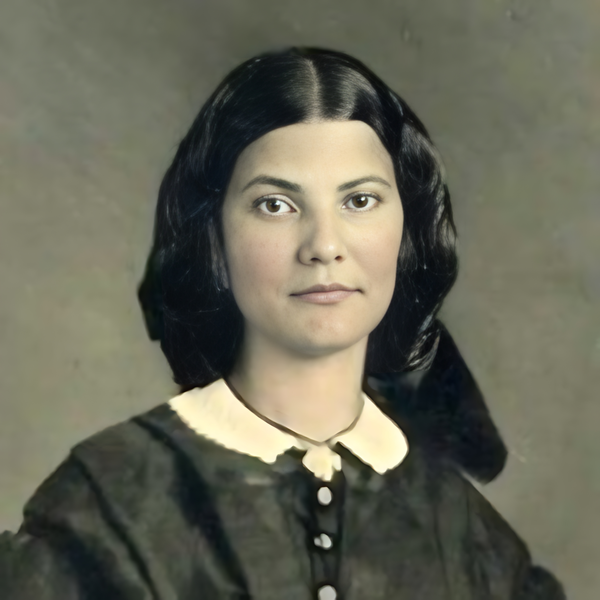

In [16]:
# Enhance faces in the image
# Calls a function to enhance faces in the refined image using GFPGAN.
# Saves the image with enhanced faces locally and displays it within the notebook.
# Handles exceptions during the face enhancement process.

# Define the path for the enhanced faces image
output_image_path = "/content/gfpgan/enhanced_output1.jpg"

try:
    # applies face enhancement, and saves the result to a new file
    enhance_faces(initial_image_path, output_image_path)

    # Display the image with enhanced faces
    # Open the enhanced image from the saved path
    enhanced_image_to_display = Image.open(output_image_path)
    display(enhanced_image_to_display.resize((600, 600), Image.LANCZOS))

except Exception as err:
    print(f"An error occurred during face enhancement: {err}")

**Testing with other image**

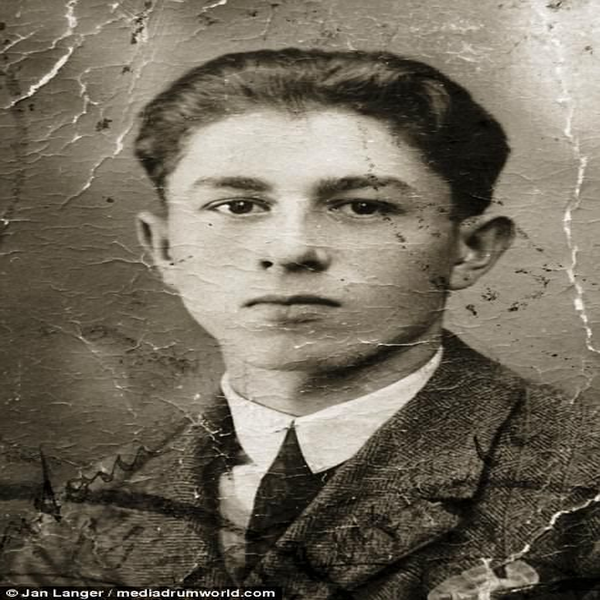

In [23]:
input_image_path = '/content/input_image_2.jpg'
# Load the image with PIL
photo = Image.open(input_image_path)
# Display the image with a specific max width and height
display(photo.resize((600, 600), Image.LANCZOS))

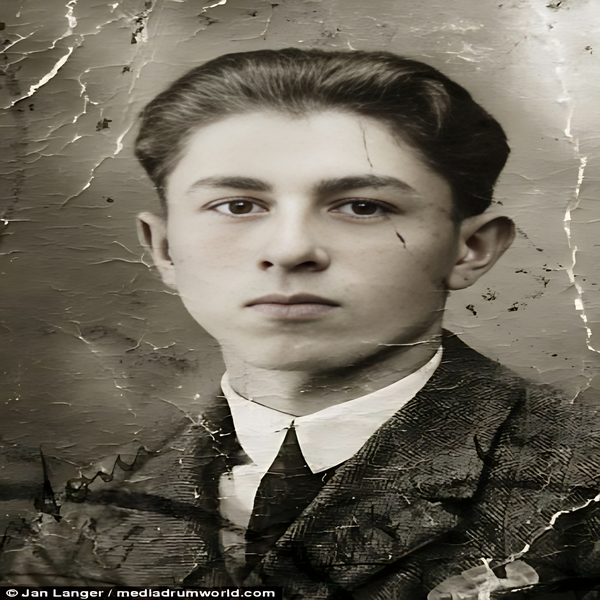

In [24]:
output_image_path = "/content/gfpgan/enhanced_output2.jpg"

# applies face enhancement, and saves the result to a new file
enhance_faces(input_image_path, output_image_path)

enhanced_image_to_display = Image.open(output_image_path)
display(enhanced_image_to_display.resize((600, 600), Image.LANCZOS))